In [1]:
from tensorflow.keras.datasets import boston_housing
import pandas as pd
import numpy as np

In [2]:
(train_data,train_labels),(test_data,test_labels)=boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
#como los datos varian en rangos distantes procedemos a un preprocesamiento de datos
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(train_data);

In [5]:
#ojo: aplicamos el la media y varianza de los datos de entrenamiento a los datos de de test
train_data=scaler.transform(train_data)
test_data=scaler.transform(test_data)

In [6]:
pd.DataFrame(train_data).aggregate(func=[np.min,np.max])

,0,1,2,3,4,5,6,7,8,9,10,11,12
amin,-0.405101,-0.483615,-1.564696,-0.256833,-1.471269,-3.817250,-2.369042,-1.287503,-0.971569,-1.311311,-2.673752,-3.771101,-1.519664
amax,9.234847,3.728990,2.445374,3.893584,2.677335,3.467186,1.110488,3.437406,1.675886,1.836097,1.603531,0.448077,3.482019


In [7]:
#ahora los que haremos es construir el modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def build_model():
    """
    construimos el modelo con dos capas ocultas de 64 neuronas c/u
    """
    model=Sequential()
    model.add(Dense(64, activation='relu',input_shape=(13,)))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(1)) #esta ultima capa en la regresion no rquire una funcion de activacion por ser un problema de regresion
    
    model.compile(optimizer='rmsprop',
                 loss='mse',
                 metrics=['mae']
                 )
    return model

In [8]:
model=build_model()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


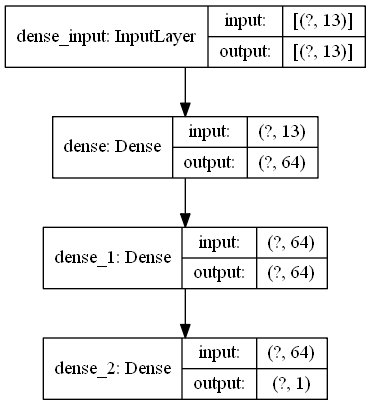

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [11]:
#ahora separamos los datos de entrenamiento y validacion
x_train=train_data[:100]
y_train=train_labels[:100]
#los datos de validacion
x_val=train_data[100:]
y_val=train_data[100:]

In [12]:
history=model.fit(x_train,y_train,epochs=10,batch_size=1,validation_data=(x_val,y_val))

Epoch 1/10
100/100 [==============================] - 0s 5ms/step - loss: 413.3751 - mae: 17.4631 - val_loss: 93.9601 - val_mae: 9.2395
Epoch 2/10
100/100 [==============================] - 0s 4ms/step - loss: 131.6984 - mae: 8.3056 - val_loss: 344.0619 - val_mae: 17.6383
Epoch 3/10
100/100 [==============================] - 0s 4ms/step - loss: 56.8036 - mae: 4.9153 - val_loss: 443.7143 - val_mae: 20.0039
Epoch 4/10
100/100 [==============================] - 0s 4ms/step - loss: 44.0942 - mae: 4.3185 - val_loss: 445.5193 - val_mae: 20.0081
Epoch 5/10
100/100 [==============================] - 0s 4ms/step - loss: 33.7031 - mae: 3.7539 - val_loss: 480.1577 - val_mae: 20.7030
Epoch 6/10
100/100 [==============================] - 0s 4ms/step - loss: 25.1874 - mae: 3.0463 - val_loss: 496.3949 - val_mae: 21.0010
Epoch 7/10
100/100 [==============================] - 0s 5ms/step - loss: 20.4032 - mae: 2.7558 - val_loss: 540.6732 - val_mae: 21.8537
Epoch 8/10
100/100 [===========================

In [13]:
model.evaluate(test_data,test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 23.6460 - mae: 3.5422


[23.64604949951172, 3.54221773147583]

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


In [15]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

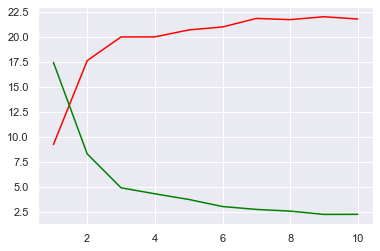

In [16]:
plt.plot(range(1,len(history.history['val_mae'])+1),history.history['val_mae'],color='red')
plt.plot(range(1,len(history.history['val_mae'])+1),history.history['mae'],color='green')

In [25]:
#como los datos destinados a entrenamiento y validacion son pepqueños optamos por realizar un validacion cruzada
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [26]:
cv=KFold(n_splits=10,shuffle=True,random_state=42)

In [29]:
model=  build_model()
model_learn=KerasRegressor(build_fn=build_model,epochs=20,batch_size=16)

In [38]:
scores=cross_validate(model_learn,train_data,train_labels,
                     cv=cv,
                      n_jobs=-1,
                      scoring=['neg_mean_absolute_error'],
                      return_train_score=True
                     )

In [40]:
scores.keys()

dict_keys(['fit_time', 'score_time', 'test_neg_mean_absolute_error', 'train_neg_mean_absolute_error'])

In [41]:
scores['test_neg_mean_absolute_error'].mean()

-2.5337011628616146

In [42]:
scores['train_neg_mean_absolute_error'].mean()

-2.2520694999539215

In [43]:
scores['train_neg_mean_absolute_error']

array([-2.37629672, -2.17569093, -2.41434335, -2.25599219, -2.22480643,
       -2.17467891, -2.13952828, -2.29115094, -2.27289952, -2.19530773])